In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import glob

In [3]:
bg_file_list = glob.glob("/data0/users/bpnachman/anomaly/bigger/processed_lhe*background.txt")
signal_file_list = glob.glob("/data0/users/bpnachman/anomaly/bigger/processed_lhe*signal.txt")

In [8]:
big_bg_path = "/data0/users/bpnachman/anomaly/bigger/processed_background.txt"

In [4]:
bg_file_list

['/data0/users/bpnachman/anomaly/bigger/processed_lhe005_background.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe004_background.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe001_background.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe006_background.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe007_background.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe002_background.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe008_background.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe003_background.txt']

In [11]:
signal_file_list

['/data0/users/bpnachman/anomaly/bigger/processed_lhe004_signal.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe005_signal.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe003_signal.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe002_signal.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe006_signal.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe009_signal.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe007_signal.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe001_signal.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe010_signal.txt',
 '/data0/users/bpnachman/anomaly/bigger/processed_lhe008_signal.txt']

In [5]:
#"Background only" i.e. no anomalies in this dataset
#myfile = open("/data0/users/bpnachman/anomaly/processed_lhe001_background.txt")

#Want to make new particles with a given mass.  E = mc^2
#Instead electron + electron -> new particle -> stuff we sift through
#electron + electron -> photon + new particle -> stuff



def parse_file(file_object):
    all_records = []
    mymeasuredenergy = []

    count = 0
    for line in file_object:

        metadata = line.split("J")[0]
        eventinfo = line.split("J")[1]
        jets = eventinfo.split("P")[0]
        particles = eventinfo.split("P")[1]

        this_record = {}
        this_record['label'] = count
        count += 1
        eventweight = float(metadata.split()[0])
        this_record['eventweight'] = eventweight #this is the event "weight".  Let's ignoreit for now (we will need it later).
        njets = int(len(jets.split())/11) #number of "jets"

        nparticles  = int(len(particles.split())/5) #number of particles




        #True collision quantities
        this_record['truthcenterofmassenergy'] = float(metadata.split()[1]) #true total energy - should be delta function at 1000 GeV
        this_record['truthsqrtshat'] = float(metadata.split()[2]) #energy available for making new particles (electron energy - photon)
        this_record['truthphotonpT'] = float(metadata.split()[3]) #photon momentum |p| in units of GeV
        this_record['truthphotoneta'] = float(metadata.split()[4]) #photon pseudorapidity (~polar angle - see e.g. https://en.wikipedia.org/wiki/Pseudorapidity)
        this_record['truthphotonphi'] = float(metadata.split()[5]) #photon azimuthal angle

        #Measured collision quantities
        measuredcenterofmassenergy  = float(metadata.split()[6]) #true measured energy - should be noisy version of truthcenterofmassenergy
        this_record['measuredcenterofmassenergy'] = measuredcenterofmassenergy
        this_record['measuredsqrtshat'] = float(metadata.split()[7]) #energy available for making new particles (electron energy - photon)
        this_record['measuredphotonpT'] = float(metadata.split()[8]) #photon momentum |p| in units of GeV
        this_record['measuredphotoneta'] = float(metadata.split()[9]) #photon pseudorapidity (~polar angle - see e.g. https://en.wikipedia.org/wiki/Pseudorapidity)
        this_record['measuredphotonphi'] = float(metadata.split()[10]) #photon azimuthal angle
        this_record['metadata'] = metadata.split()

        mymeasuredenergy+=[measuredcenterofmassenergy]

        this_record['njets'] = njets
        jets = jets.split()
        jets_vec = []
        for i in range(njets):
            jet = np.zeros(11)
            #order:
            # - index
            # - magnitude of momentum |p| (units of GeV)
            # - pseudorapidity (~polar angle - see e.g. https://en.wikipedia.org/wiki/Pseudorapidity)
            # - azimuthal angle
            # - mass (units of GeV/c^2)
            # - bit encoding of the jet "flavor" (not totally sure what the bit means, but will look it up)
            # - 0th angular moment of jet radiation
            # - 1th angular moment of jet radiation
            # - 2th angular moment of jet radiation
            # - 3th angular moment of jet radiation
            # - 4th angular moment of jet radiation
            jet = jets[i*11:i*11+11]
            jets_vec+=[jet]

        this_record['jets']=jets_vec

        this_record['nparticles'] = nparticles

        particles = particles.split()
        particles_vec = []
        for i in range(nparticles):
            particle = np.zeros(5)
            #order:
            # - index
            # - magnitude of momentum |p| (units of GeV)
            # - pseudorapidity (~polar angle - see e.g. https://en.wikipedia.org/wiki/Pseudorapidity)
            # - azimuthal angle
            # - particle identifier (https://pdg.lbl.gov/2006/reviews/pdf-files/montecarlo-web.pdf)
            particle = particles[i*5:i*5+5]
            particles_vec+=[particle]
            #print(particles[i*5],particles[i*5+1],particles[i*5+2],particles[i*5+3],particles[i*5+4])
        this_record['particles'] = particles_vec

        all_records.append(this_record)
    return all_records

In [9]:
file = open(big_bg_path)
bg_records = parse_file(file)

In [10]:
len(bg_records)

1270000

In [12]:
sig_records = []
for filename in signal_file_list:
    file = open(filename)
    sig_records += parse_file(file)

In [36]:
len(sig_records)

100000

In [18]:
# for i in sig_records:
#     i['from_anomaly_data'] = True

In [19]:
# for i in bg_records:
#     i['from_anomaly_data'] = False

In [47]:
# all_records = sig_records[:10000] + bg_records

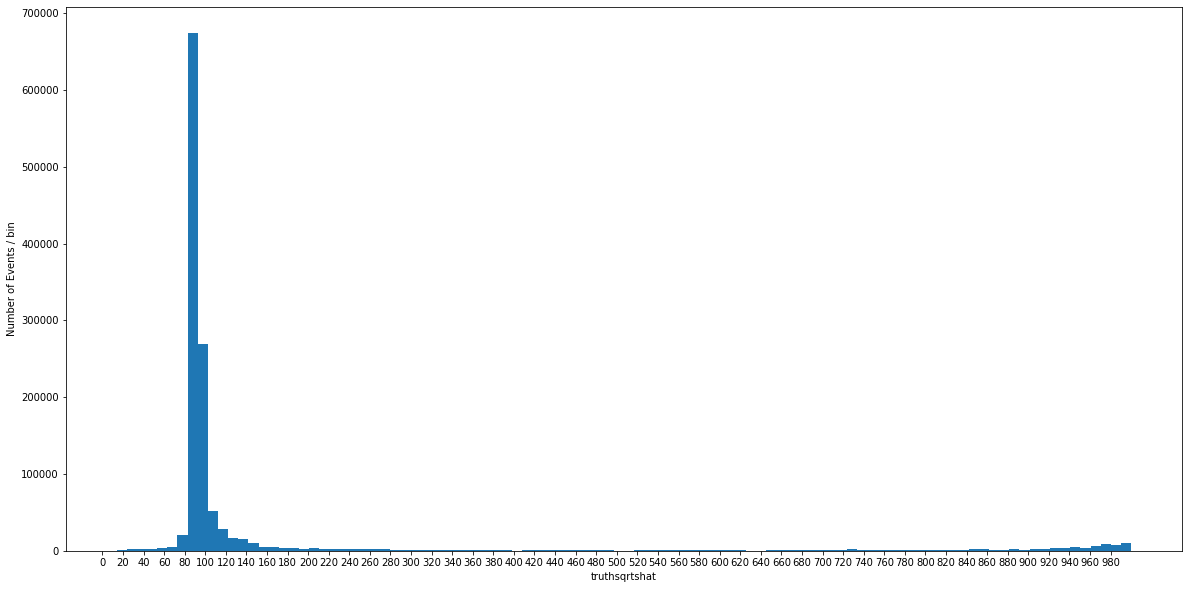

In [29]:
plt.figure(figsize=(20,10))
this_arr = np.array([i['truthsqrtshat'] for i in bg_records])
plt.hist(this_arr, bins=100)
#plt.hist(this_arr, bins=np.logspace(1.5,3,30))
#plt.xscale('log')
plt.xticks(range(0,1000,20))
plt.xlabel("truthsqrtshat")
plt.ylabel("Number of Events / bin")
np.save('training_data/bg_truthsqrtshat', this_arr)

## EFN experimenting

### imports and settings

In [91]:
import energyflow as ef
from energyflow.archs import PFN
from energyflow.datasets import qg_jets
from energyflow.utils import data_split, remap_pids, to_categorical
from sklearn.metrics import roc_auc_score, roc_curve


Using TensorFlow backend.
/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/shared_env/l

In [92]:
from sklearn.utils import shuffle

### Divide up the data

(array([7.0800e+02, 1.1924e+04, 3.4707e+04, 3.1045e+04, 1.5564e+04,
        4.6450e+03, 1.1000e+03, 2.5000e+02, 5.2000e+01, 5.0000e+00]),
 array([ 36. ,  51.7,  67.4,  83.1,  98.8, 114.5, 130.2, 145.9, 161.6,
        177.3, 193. ]),
 <a list of 10 Patch objects>)

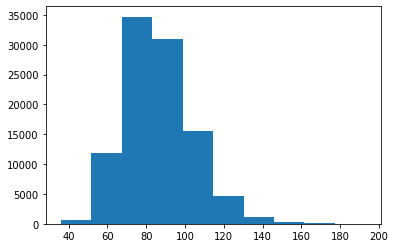

In [99]:
plt.hist([i['nparticles'] for i in sig_records])

(array([1.360e+02, 2.501e+03, 4.060e+03, 2.907e+03, 1.131e+03, 4.240e+02,
        1.510e+02, 4.600e+01, 3.000e+00, 3.000e+00]),
 array([  8. ,  28.3,  48.6,  68.9,  89.2, 109.5, 129.8, 150.1, 170.4,
        190.7, 211. ]),
 <a list of 10 Patch objects>)

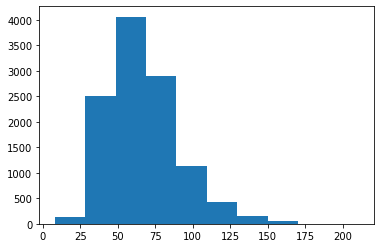

In [100]:
plt.hist([i['nparticles'] for i in bg_records if (i['truthsqrtshat'] > 140 and i['truthsqrtshat'] < 560)])

### Save particles only as X

Save all particles in 3d array. dim 0 = datapoints; dim 1 = particles; dim 2 = particle features.

Particle features have original index 0 omitted. new index 0, 1, 2 are numerical. index 3 is PID

In [14]:
max_bg = max([i['nparticles'] for i in bg_records])

In [16]:
max_sig = max([i['nparticles'] for i in sig_records])

In [19]:
max_nparticles = max((max_bg, max_sig))

In [21]:
"""
Run this cell to save bg particles as X_bg
"""
padded_part_arrays =[]
for record in bg_records:
    # convert to np array
    these_particles = np.array(record['particles']).astype('float')
    # omit index 0
    these_particles = these_particles[:,1:]
    # determine how many zero values to pad
    pad_length = max_nparticles - these_particles.shape[0]
    #pad
    padded_particles = np.pad(these_particles, ((0,pad_length),(0,0)))
    # check padding
    assert padded_particles.shape == (max_nparticles, 4)
    # add to list
    padded_part_arrays.append(padded_particles)
    
all_particle_array = np.array(padded_part_arrays)
X_bg = all_particle_array

In [22]:
X_bg.shape

(1270000, 267, 4)

In [24]:
"""
Run this cell to save X_bg to disk
"""

path = "training_data/X_bg"
np.save(path, X_bg)

In [ ]:
y_bg = np.array([i['truthsqrtshat'] for i in bg_records])

In [32]:
"""
Run this cell to save y_bg to disk
"""
path = "training_data/y_bg"

np.save(path, y_bg)

In [35]:
y_bg.shape

(1270000,)

In [37]:
"""
Get X_sig and y_sig
"""
padded_part_arrays =[]
for record in sig_records:
    # convert to np array
    these_particles = np.array(record['particles']).astype('float')
    # omit index 0
    these_particles = these_particles[:,1:]
    # determine how many zero values to pad
    pad_length = max_nparticles - these_particles.shape[0]
    #pad
    padded_particles = np.pad(these_particles, ((0,pad_length),(0,0)))
    # check padding
    assert padded_particles.shape == (max_nparticles, 4)
    # add to list
    padded_part_arrays.append(padded_particles)
    
all_particle_array = np.array(padded_part_arrays)
X_sig = all_particle_array
y_sig = np.array([i['truthsqrtshat'] for i in sig_records])

In [39]:
"""
Run this cell to save X_sig and y_sig to disk
"""

X_sig_path = "training_data/X_sig"
y_sig_path = "training_data/y_sig"
np.save(X_sig_path, X_sig)
np.save(y_sig_path, y_sig)

In [80]:
y_sig.shape

(100000,)

In [52]:
X.shape

(89999, 260, 4)

### Save jets as Z

In [58]:
all_records[0]['jets']

[['0',
  '189.98',
  '-1.62299',
  '1.02308',
  '89.4432',
  '0',
  '0.429496',
  '0.0397034',
  '0.0308161',
  '0.0261881',
  '0.0196577']]

In [55]:
max_njets = max([i['njets'] for i in all_records])

In [71]:
padded_jet_arrays =[]
for record in all_records:
    # convert to np array
    these_jets = np.array(record['jets']).astype('float')
    # omit index 0
    if len(these_jets) == 0:
        these_jets = np.zeros(11).reshape([1,11])
    these_jets = these_jets[:,1:]
        
    # determine how many zero values to pad
    pad_length = max_njets - these_jets.shape[0]
    #pad
    padded_jets = np.pad(these_jets, ((0,pad_length),(0,0)))
    # check padding
    assert padded_jets.shape == (max_njets, 10)
    # add to list
    padded_jet_arrays.append(padded_jets)
    
all_jet_array = np.array(padded_jet_arrays)
Z = all_jet_array

In [72]:
Z.shape

(79999, 8, 10)

### Save measured truthsqrtshat as y

In [53]:
# y = np.array([i['truthsqrtshat'] for i in all_records])

In [54]:
# y.shape

(89999,)

### Identify signal & side band

In [58]:
side_band_left = 160
side_band_right = 540
signal_left = 300
signal_right = 400
def binary_side_band(y_thing):
    if y_thing >= signal_left and y_thing < signal_right:
        return 1
    elif y_thing >= side_band_left and y_thing < side_band_right:
        return 0
    else:
        return -1


In [59]:
y_binary = np.vectorize(binary_side_band)(y_bg)

In [118]:
np.unique(y_sideband,return_counts = True)

(array([0]), array([51562]))

In [61]:
side_band_indicator = (y_binary == 0)

In [63]:
X_sideband = X_bg[side_band_indicator]
y_sideband = y_binary[side_band_indicator]

In [64]:
bg_signal_indicator = (y_binary == 1)

In [65]:
X_bgsignal = X_bg[bg_signal_indicator]
y_bgsignal = y_binary[bg_signal_indicator]

### Select signal & side band data points

In [60]:
X_selected = X[within_bounds_indicator]
y_selected = y_binary[within_bounds_indicator]

### Preprocessing

In [69]:
X_bgsignal[:50000].shape

(11049, 267, 4)

In [66]:
X_sideband.shape

(51562, 267, 4)

In [70]:
np.concatenate([X_bgsignal]*3).shape

(33147, 267, 4)

In [68]:
np.concatenate([y_sideband, y_bgsignal]).shape

(62611,)

In [82]:
import math
from sklearn.utils import shuffle

In [79]:
round(2.500000001)

3

In [122]:
def prep_and_shufflesplit_data(anomaly_ratio, size_each = 50000, shuffle_seed = 69, train = 0.7, val = 0.2, test = 0.1):
    
    assert (size_each <= min(X_sideband.shape[0], X_sig.shape[0]))
    
    #how much bg and signal data to take?
    anom_size = round(anomaly_ratio * size_each)
    bg_sig_size = size_each - anom_size
    
    # select sideband datapoints
    this_X_sideband = X_sideband[:size_each]
    this_y_sideband = y_sideband[:size_each]
    
    # duplicate bgsignal datapoints
    this_X_bgsignal = np.copy(X_bgsignal)
    this_y_bgsignal = np.copy(y_bgsignal)
        
    (this_X_bgsignal, this_X_bgsignal_v, this_X_bgsignal_t,
     this_y_bgsignal, this_y_bgsignal_v, this_y_bgsignal_t) = data_split(this_X_bgsignal, this_y_bgsignal, val=val, test=test)
    
    bg_sig_size_tr = round(bg_sig_size * train)
    
    if this_X_bgsignal.shape[0] < bg_sig_size_tr:
        
        multiplier = math.ceil(bg_sig_size_tr/this_X_bgsignal.shape[0])
        
        this_X_bgsignal = np.concatenate([this_X_bgsignal] * multiplier)
        this_y_bgsignal = np.concatenate([this_y_bgsignal] * multiplier)
        
        this_X_bgsignal_v = np.concatenate([this_X_bgsignal_v] * multiplier)
        this_y_bgsignal_v = np.concatenate([this_y_bgsignal_v] * multiplier)
        
        this_X_bgsignal_t = np.concatenate([this_X_bgsignal_t] * multiplier)
        this_y_bgsignal_t = np.concatenate([this_y_bgsignal_t] * multiplier)
        
        
        
    assert this_X_bgsignal.shape[0] == this_y_bgsignal.shape[0]
    
    #select bgsignal datapoints
    this_X_bgsignal = this_X_bgsignal[:bg_sig_size_tr]
    this_y_bgsignal = this_y_bgsignal[:bg_sig_size_tr]
    
    this_X_bgsignal_v = this_X_bgsignal_v[:round(bg_sig_size * val)]
    this_y_bgsignal_v = this_y_bgsignal_v[:round(bg_sig_size * val)]
    
    this_X_bgsignal_t = this_X_bgsignal_t[:round(bg_sig_size * test)]
    this_y_bgsignal_t = this_y_bgsignal_t[:round(bg_sig_size * test)]
    
    #select anomaly datapoints
    this_X_anom = X_sig[:anom_size]
    this_y_anom = np.ones(anom_size)
    
    
    
    # only bg_sig has been split. Now, we have to shuffle then split the others.
    this_X = np.concatenate([this_X_sideband, this_X_anom])
    this_y = np.concatenate([this_y_sideband, this_y_anom])
    
    assert this_X.shape[0] == this_y.shape[0]
    this_X, this_y = shuffle(this_X, this_y, random_state = shuffle_seed)
    
    (this_X_train, this_X_val, this_X_test,
     this_y_train, this_y_val, this_y_test) = data_split(this_X, this_y, val=val, test=test)
    
    # now, we can add the bg_sig to the rest of the data and shuffle again
    X_train, y_train = shuffle(np.concatenate([this_X_train, this_X_bgsignal]),
                               np.concatenate([this_y_train, this_y_bgsignal]),
                              random_state = shuffle_seed)
    X_val, y_val = shuffle(np.concatenate([this_X_val, this_X_bgsignal_v]),
                               np.concatenate([this_y_val, this_y_bgsignal_v]),
                              random_state = shuffle_seed)
    X_test, y_test = shuffle(np.concatenate([this_X_test, this_X_bgsignal_t]),
                               np.concatenate([this_y_test, this_y_bgsignal_t]),
                              random_state = shuffle_seed)
    
    
    # Centre and normalize all the Xs
    for x in X_train:
        mask = x[:,0] > 0
        yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
        x[mask,1:3] -= yphi_avg
        x[mask,0] /= x[:,0].sum()
    for x in X_val:
        mask = x[:,0] > 0
        yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
        x[mask,1:3] -= yphi_avg
        x[mask,0] /= x[:,0].sum()
    for x in X_test:
        mask = x[:,0] > 0
        yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
        x[mask,1:3] -= yphi_avg
        x[mask,0] /= x[:,0].sum()
    
    # remap PIDs for all the Xs
    remap_pids(X_train, pid_i=3)
    remap_pids(X_val, pid_i=3)
    remap_pids(X_test, pid_i=3)
    
    # change Y to categorical Matrix
    Y_train = to_categorical(y_train, num_classes=2)
    Y_val = to_categorical(y_val, num_classes=2)
    Y_test = to_categorical(y_test, num_classes=2)

    
    return X_train, X_val, X_test, Y_train,Y_val,Y_test
    

In [123]:
X_train, X_val, X_test, Y_train,Y_val,Y_test = prep_and_shufflesplit_data(0.1)

In [66]:
# train, val, test = 18000, 2000, 1186
# use_pids = True


In [67]:
# # center and normalize
# X_normalized = np.copy(X_shuffled)
# for x in X_normalized:
#     mask = x[:,0] > 0
#     yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
#     x[mask,1:3] -= yphi_avg
#     x[mask,0] /= x[:,0].sum()


In [68]:
# # handle particle id channel
# if use_pids:
#     remap_pids(X_normalized, pid_i=3)
# else:
#     X_normalized = X_normalized[:,:,:3]

In [69]:
# categorize y
# Y = to_categorical(y_shuffled, num_classes=2)

In [70]:
# # do train/val/test split 
# (X_train, X_val, X_test,
#  Y_train, Y_val, Y_test) = data_split(X_normalized, Y, val=val, test=test)

### Building the model

In [136]:
Phi_sizes, F_sizes = (10, 10, 16), (40, 20)
num_epoch = 5
batch_size = 10

In [137]:
def train_models(X_train, X_val, X_test, Y_train,Y_val,Y_test):
    model = PFN(input_dim=X_train.shape[-1], Phi_sizes=Phi_sizes, F_sizes=F_sizes)
    history = model.fit(X_train, Y_train,
          epochs=num_epoch,
          batch_size=batch_size,
          validation_data=(X_val, Y_val),
          verbose=1)
    Y_predict = model.predict(X_test)
    
    return (history, Y_test, Y_predict)
    

In [138]:
all_results = []

In [139]:
X_train, X_val, X_test, Y_train,Y_val,Y_test = prep_and_shufflesplit_data(0.05)
all_results.append(train_models(X_train, X_val, X_test, Y_train,Y_val,Y_test))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 4)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 10)     50          input[0][0]                      
__________________________________________________________________________________________________
activation_13 (Activation)      (None, None, 10)     0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 10)     110         activation_13[0][0]              
__________________________________________________________________________________________________
activation

In [140]:
X_train, X_val, X_test, Y_train,Y_val,Y_test = prep_and_shufflesplit_data(0.005)
all_results.append(train_models(X_train, X_val, X_test, Y_train,Y_val,Y_test))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 4)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 10)     50          input[0][0]                      
__________________________________________________________________________________________________
activation_19 (Activation)      (None, None, 10)     0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 10)     110         activation_19[0][0]              
__________________________________________________________________________________________________
activation

In [141]:
X_train, X_val, X_test, Y_train,Y_val,Y_test = prep_and_shufflesplit_data(0.0005)
all_results.append(train_models(X_train, X_val, X_test, Y_train,Y_val,Y_test))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 4)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 10)     50          input[0][0]                      
__________________________________________________________________________________________________
activation_25 (Activation)      (None, None, 10)     0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 10)     110         activation_25[0][0]              
__________________________________________________________________________________________________
activation

In [142]:
X_train, X_val, X_test, Y_train,Y_val,Y_test = prep_and_shufflesplit_data(0.00005)
all_results.append(train_models(X_train, X_val, X_test, Y_train,Y_val,Y_test))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 4)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 10)     50          input[0][0]                      
__________________________________________________________________________________________________
activation_31 (Activation)      (None, None, 10)     0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 10)     110         activation_31[0][0]              
__________________________________________________________________________________________________
activation

In [143]:
X_train, X_val, X_test, Y_train,Y_val,Y_test = prep_and_shufflesplit_data(0)
all_results.append(train_models(X_train, X_val, X_test, Y_train,Y_val,Y_test))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 4)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 10)     50          input[0][0]                      
__________________________________________________________________________________________________
activation_37 (Activation)      (None, None, 10)     0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 10)     110         activation_37[0][0]              
__________________________________________________________________________________________________
activation

In [ ]:
X_train, X_val, X_test, Y_train,Y_val,Y_test = prep_and_shufflesplit_data(0)
all_results.append(train_models(X_train, X_val, X_test, Y_train,Y_val,Y_test))

In [145]:
0.00005

5e-05

In [144]:
1/50000

2e-05

In [75]:
# # build architecture
# pfn = PFN(input_dim=X.shape[-1], Phi_sizes=Phi_sizes, F_sizes=F_sizes)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 4)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 10)     50          input[0][0]                      
__________________________________________________________________________________________________
activation_8 (Activation)       (None, None, 10)     0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 10)     110         activation_8[0][0]               
__________________________________________________________________________________________________
activation

### Training

In [76]:
h = pfn.fit(X_train, Y_train,
          epochs=num_epoch,
          batch_size=batch_size,
          validation_data=(X_val, Y_val),
          verbose=1)

Train on 18000 samples, validate on 2000 samples
Epoch 1/30
18000/18000 [==============================] - 12s 691us/step - loss: 1.2210 - acc: 0.5951 - val_loss: 0.6212 - val_acc: 0.6400
Epoch 2/30
18000/18000 [==============================] - 12s 650us/step - loss: 0.6400 - acc: 0.6742 - val_loss: 0.5815 - val_acc: 0.6905
Epoch 3/30
18000/18000 [==============================] - 12s 648us/step - loss: 0.5691 - acc: 0.7208 - val_loss: 0.5555 - val_acc: 0.7165
Epoch 4/30
18000/18000 [==============================] - 12s 649us/step - loss: 0.5409 - acc: 0.7372 - val_loss: 0.5329 - val_acc: 0.7275
Epoch 5/30
18000/18000 [==============================] - 12s 646us/step - loss: 0.5027 - acc: 0.7678 - val_loss: 0.5012 - val_acc: 0.7610
Epoch 6/30
18000/18000 [==============================] - 12s 648us/step - loss: 0.4755 - acc: 0.7856 - val_loss: 0.4776 - val_acc: 0.7830
Epoch 7/30
18000/18000 [==============================] - 12s 651us/step - loss: 0.4612 - acc: 0.7921 - val_loss: 0.4

In [78]:
Y_predict = pfn.predict(X_test)

In [124]:
import sklearn

In [91]:
roc_curve = sklearn.metrics.roc_curve(Y_test[:,1:], Y_predict[:,1:])

Text(0.5, 1.0, 'ROC curve')

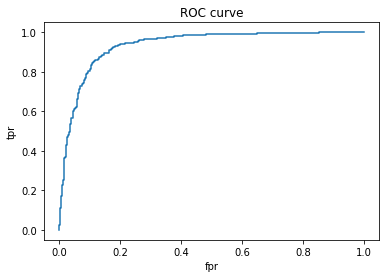

In [94]:
plt.plot(roc_curve[0],roc_curve[1])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'ROC curve')

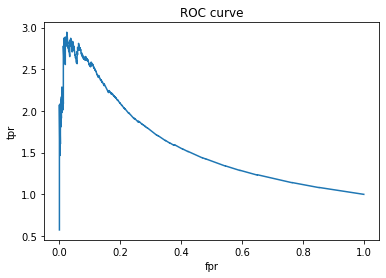

In [101]:
plt.plot(roc_curve[0],roc_curve[1]/np.sqrt(roc_curve[0]))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

In [31]:
#Later for ML: https://energyflow.network/examples/